## Point table

In [1]:
import pickle
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib._png import read_png

%matplotlib inline

# Index
home_team_stat = pickle.load(open("home_team_stat.p","rb" )).flatten()
away_team_stat = pickle.load(open("away_team_stat.p","rb" )).flatten()
home_team_dyn = pickle.load(open("home_team_dyn.p","rb" )).flatten()
away_team_dyn = pickle.load(open("away_team_dyn.p","rb" )).flatten()

# Points
act_home_points = pickle.load(open("act_home_points.p","rb" ))
act_away_points = pickle.load(open("act_away_points.p","rb" ))
sim_home_points_stat = pickle.load(open("sim_home_points_stat.p","rb" ))
sim_away_points_stat = pickle.load(open("sim_away_points_stat.p","rb" ))
sim_home_points_dyn = pickle.load(open("sim_home_points_dyn.p","rb" ))
sim_away_points_dyn = pickle.load(open("sim_away_points_dyn.p","rb" ))

# Home and away goals
act_home_scored = pickle.load(open("act-home-scored.p","rb" )).flatten()
act_away_scored = pickle.load(open("act-away-scored.p","rb" )).flatten()
sim_home_scored_stat = pickle.load(open("sim-home-scored-stat.p","rb" )).flatten()
sim_away_scored_stat = pickle.load(open("sim-away-scored-stat.p","rb" )).flatten()
sim_home_scored_dyn = pickle.load(open("sim_home_scored-dyn.p","rb" )).flatten()
sim_away_scored_dyn = pickle.load(open("sim_away_scored-dyn.p","rb" )).flatten()

teams = pickle.load(open("teams.p","rb" ))

# Total points
# Points come from server -> dynamic index!
total_act_home_points = ((np.mgrid[:20,:380] == home_team_dyn)[0] * act_home_points).sum(axis=1)
total_act_away_points = ((np.mgrid[:20,:380] == away_team_dyn)[0] * act_away_points).sum(axis=1)
total_act_points = total_act_home_points + total_act_away_points

total_sim_home_points_stat = ((np.mgrid[:20,:380] == home_team_stat)[0] * sim_home_points_stat).sum(axis=1)
total_sim_away_points_stat = ((np.mgrid[:20,:380] == away_team_stat)[0] * sim_away_points_stat).sum(axis=1)
total_sim_points_stat = total_sim_home_points_stat + total_sim_away_points_stat

total_sim_home_points_dyn = ((np.mgrid[:20,:380] == home_team_dyn)[0] * sim_home_points_dyn).sum(axis=1)
total_sim_away_points_dyn = ((np.mgrid[:20,:380] == away_team_dyn)[0] * sim_away_points_dyn).sum(axis=1)
total_sim_points_dyn = total_sim_home_points_dyn + total_sim_away_points_dyn

# Total scored act/stat/dyn
# Scores come from local -> static index!
total_act_home_scored = ((np.mgrid[:20,:380] == home_team_stat)[0] * act_home_scored).sum(axis=1)
total_act_away_scored = ((np.mgrid[:20,:380] == away_team_stat)[0] * act_away_scored).sum(axis=1)

total_sim_home_scored_stat = ((np.mgrid[:20,:380] == home_team_stat)[0] * sim_home_scored_stat).sum(axis=1)
total_sim_away_scored_stat = ((np.mgrid[:20,:380] == away_team_stat)[0] * sim_away_scored_stat).sum(axis=1)

total_sim_home_scored_dyn = ((np.mgrid[:20,:380] == home_team_dyn)[0] * sim_home_scored_dyn).sum(axis=1)
total_sim_away_scored_dyn = ((np.mgrid[:20,:380] == away_team_dyn)[0] * sim_away_scored_dyn).sum(axis=1)

# Build table
point_table = pd.DataFrame()
point_table['team'] = teams['team']

point_table['obs_points'] = total_act_points
point_table['act_h'] = total_act_home_scored
point_table['act_a'] = total_act_away_scored

point_table['stat_points'] = total_sim_points_stat
point_table['stat_h'] = total_sim_home_scored_stat
point_table['stat_a'] = total_sim_away_scored_stat

point_table['dyn_points'] = total_sim_points_dyn
point_table['dyn_h'] = total_sim_home_scored_dyn
point_table['dyn_a'] = total_sim_away_scored_dyn

# Is correct, compared to Wikipedia league table!
point_table.sort_values(by='obs_points', ascending=False)

,team,obs_points,act_h,act_a,stat_points,stat_h,stat_a,dyn_points,dyn_h,dyn_a
1,Chelsea,87,36,37,98,37,33,96,34,31
9,Manchester City,79,44,39,82,37,28,86,39,30
0,Arsenal,75,41,30,69,32,22,74,32,27
2,Manchester United,70,41,21,61,33,19,70,35,22
8,Tottenham Hotspur,64,31,27,50,24,19,53,30,22
3,Liverpool,62,30,22,46,23,19,56,27,21
6,Southampton,60,37,17,68,27,19,67,27,20
19,Swansea City,56,27,19,48,21,19,36,22,18
15,Stoke City,54,32,16,40,18,19,48,23,17
11,Crystal Palace,48,21,26,36,20,20,41,23,17


## Point stats from dynamic model

In [3]:
import pickle

act_home_points = pickle.load(open("act_home_points.p","rb" )).flatten()
act_away_points = pickle.load(open("act_away_points.p","rb" )).flatten()
sim_home_points_dyn = pickle.load(open("sim_home_points_dyn.p","rb" )).flatten()
sim_away_points_dyn = pickle.load(open("sim_away_points_dyn.p","rb" )).flatten()
sim_home_points_stat = np.array(pickle.load(open("sim_home_points_stat.p","rb" ))).flatten()
sim_away_points_stat = np.array(pickle.load(open("sim_away_points_stat.p","rb" ))).flatten()
home_team_stat = pickle.load(open("home_team_stat.p","rb" )).flatten()
away_team_stat = pickle.load(open("away_team_stat.p","rb" )).flatten()
home_team_dyn = pickle.load(open("home_team_dyn.p","rb" )).flatten()
away_team_dyn = pickle.load(open("away_team_dyn.p","rb" )).flatten()

## Cumulative Point Plot

In [4]:
act_home_points = np.array(act_home_points)
act_away_points = np.array(act_away_points)
sim_home_points_stat = np.array(sim_home_points_stat)
sim_away_points_stat = np.array(sim_away_points_stat)
sim_home_points_dyn = np.array(sim_home_points_dyn)
sim_away_points_dyn = np.array(sim_away_points_dyn)



total_act_home_points = ((np.mgrid[:20,:380] == home_team_dyn)[0] * act_home_points).sum(axis=1)
total_act_away_points = ((np.mgrid[:20,:380] == away_team_dyn)[0] * act_away_points).sum(axis=1)
total_sim_home_points_stat = ((np.mgrid[:20,:380] == home_team_stat)[0] * sim_home_points_stat).sum(axis=1)
total_sim_away_points_stat = ((np.mgrid[:20,:380] == away_team_stat)[0] * sim_away_points_stat).sum(axis=1)
total_sim_home_points_dyn = ((np.mgrid[:20,:380] == home_team_dyn)[0] * sim_home_points_dyn).sum(axis=1)
total_sim_away_points_dyn = ((np.mgrid[:20,:380] == away_team_dyn)[0] * sim_away_points_dyn).sum(axis=1)

total_act_points = total_act_home_points + total_act_away_points
total_sim_points_stat = total_sim_home_points_stat + total_sim_away_points_stat
total_sim_points_dyn = total_sim_home_points_dyn + total_sim_away_points_dyn

week_act_home_points = []
week_act_away_points = []
week_sim_home_points_stat = []
week_sim_away_points_stat = []
week_sim_home_points_dyn = []
week_sim_away_points_dyn = []

for w in range(0,38):
    week_act_home_points.append(((np.mgrid[:20,:10] == home_team_dyn[10*w:10*w+10])[0] * act_home_points[10*w:10*w+10]).sum(axis=1))
    week_act_away_points.append(((np.mgrid[:20,:10] == away_team_dyn[10*w:10*w+10])[0] * act_away_points[10*w:10*w+10]).sum(axis=1))
    week_sim_home_points_stat.append(((np.mgrid[:20,:10] == home_team_stat[10*w:10*w+10])[0] * sim_home_points_stat[10*w:10*w+10]).sum(axis=1))
    week_sim_away_points_stat.append(((np.mgrid[:20,:10] == away_team_stat[10*w:10*w+10])[0] * sim_away_points_stat[10*w:10*w+10]).sum(axis=1))
    week_sim_home_points_dyn.append(((np.mgrid[:20,:10] == home_team_dyn[10*w:10*w+10])[0] * sim_home_points_dyn[10*w:10*w+10]).sum(axis=1))
    week_sim_away_points_dyn.append(((np.mgrid[:20,:10] == away_team_dyn[10*w:10*w+10])[0] * sim_away_points_dyn[10*w:10*w+10]).sum(axis=1))

week_total_act_points = np.array(week_act_home_points) + np.array(week_act_away_points)
week_total_sim_points_stat = np.array(week_sim_home_points_stat) + np.array(week_sim_away_points_stat)
week_total_sim_points_dyn = np.array(week_sim_home_points_dyn) + np.array(week_sim_away_points_dyn)

xs = range(1,38+1)

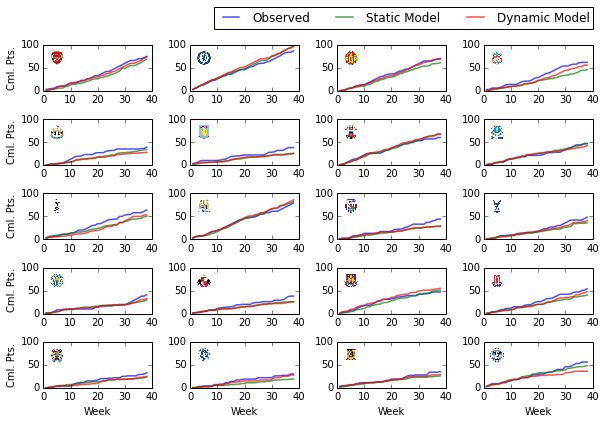

In [27]:
fig, ax = plt.subplots(5,4,figsize=(8.5,5.5))
c = 0
for i in range(0,5):
    for j in range(0,4):
        ob_cuml_week = [sum(week_total_act_points[:,c][:k]) for k in range(1, len(week_total_act_points[:,c])+1)]
        stat_cuml_week = [sum(week_total_sim_points_stat[:,c][:k]) for k in range(1, len(week_total_sim_points_stat[:,c])+1)]
        dyn_cuml_week = [sum(week_total_sim_points_dyn[:,c][:k]) for k in range(1, len(week_total_sim_points_dyn[:,c])+1)]
        
        if (j == 0): ax[i][j].set_ylabel('Cml. Pts.')
        if (i == 4): ax[i][j].set_xlabel('Week')
        ax[i][j].axis([0, 40, 0, 100])
        ax[i][j].set_yticks(np.arange(0, 101, 50))
        ax[i][j].set_xticks(np.arange(0, 41, 10))
        
        ax[i][j].plot(xs, ob_cuml_week, marker=None, markersize=10, linewidth=1.5, alpha=0.7, label='Observed')
        ax[i][j].plot(xs, stat_cuml_week, marker=None, markersize=10, linewidth=1.5, alpha=0.7, label='Static Model')
        ax[i][j].plot(xs, dyn_cuml_week, marker=None, markersize=10, linewidth=1.5, alpha=0.7, label='Dynamic Model')

        team = teams['team'][c].lower().replace(" ", "_")
        team_name = teams['team'][c]

        file = get_sample_data("/Users/moe/Desktop/Drive/UCL/thesis/Oxford-Template/crests/" + team +  "_1.png", asfileobj=False)
        icon = read_png(file)
        imagebox = OffsetImage(icon, zoom=0.055)

        crest = AnnotationBbox(imagebox, xycoords='axes fraction', xy=(0+0.125,0.72), frameon=False)
        ax[i][j].add_artist(crest)
#         ax[i][j].annotate(teams["team"][c], xycoords='axes fraction', xy=(1-0.110,0.075),
#                          horizontalalignment='right', verticalalignment='bottom')
        
        c += 1

fig.tight_layout()
ax[0][3].legend(loc='upper right', bbox_to_anchor=(1.063, 1.96), ncol=3)
plt.savefig("/Users/moe/Desktop/Drive/UCL/thesis/Oxford-Template/figures/ppc-points.pdf",bbox_inches='tight')
plt.show()

In [32]:
# Calculate 95% CI
def mci(samples):
    lb = np.percentile(samples, 2.5, axis=1)
    mn = np.mean(samples, axis=1)
    md = np.percentile(samples, 50, axis=1)
    ub = np.percentile(samples, 97.5, axis=1)
    return md, mn, lb, ub

import pickle
samples = pickle.load(open("samples-static.p", "rb"))

att_mcis_stat = []
def_mcis_stat = []

for i in range(0,38):
    t = samples[i]

    atts = t['atts']
    defs = t['defs']

    att_mcis_stat.append(mci(atts))
    def_mcis_stat.append(mci(defs))
    
att_mcis_stat = np.swapaxes(np.array(att_mcis_stat),0,2)
def_mcis_stat = np.swapaxes(np.array(def_mcis_stat),0,2)

xs = range(1,38+1)

att_mcis_dyn = pickle.load(open("att_mcis.p","rb" ))

def_mcis_dyn = pickle.load(open("def_mcis.p","rb"))

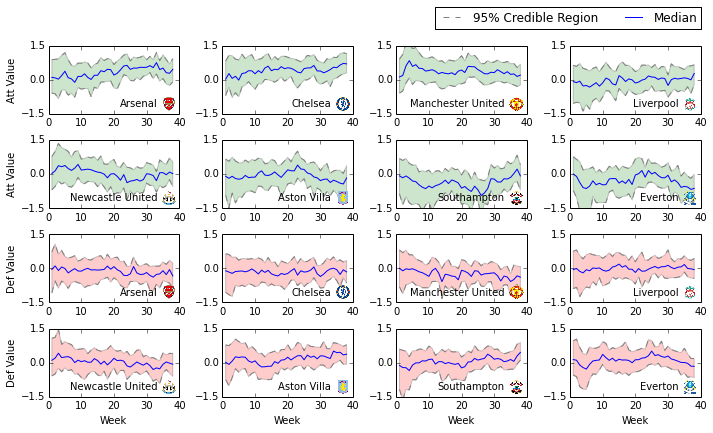

In [31]:
fig, ax = plt.subplots(4,4,figsize=(10,6))
c = 0
team_ix = [0,9,1,15,7,4,5,16]

for i in range(0,4):
    for j in range(0,4):
        cc = team_ix[c]
        
        att_md_dyn = att_mcis_dyn[cc][0]
        att_mn_dyn = att_mcis_dyn[cc][1]
        att_lb_dyn = att_mcis_dyn[cc][2]
        att_ub_dyn = att_mcis_dyn[cc][3]

        def_md_dyn = def_mcis_dyn[cc][0]
        def_mn_dyn = def_mcis_dyn[cc][1]
        def_lb_dyn = def_mcis_dyn[cc][2]
        def_ub_dyn = def_mcis_dyn[cc][3]

        att_md_stat = att_mcis_stat[cc][0]
        att_mn_stat = att_mcis_stat[cc][1]
        att_lb_stat = att_mcis_stat[cc][2]
        att_ub_stat = att_mcis_stat[cc][3]

        def_md_stat = def_mcis_stat[cc][0]
        def_mn_stat = def_mcis_stat[cc][1]
        def_lb_stat = def_mcis_stat[cc][2]
        def_ub_stat = def_mcis_stat[cc][3]
        
        if (i < 2):
            if (j == 0): ax[i][j].set_ylabel('Att Value')
            ax[i][j].axis([0, 40, -1.5, 1.5])
            ax[i][j].set_xticks(np.arange(0, 41, 10))
            ax[i][j].set_yticks(np.arange(-1.5, 1.51, 1.5))
            
#             ax[i][j].plot(xs, att_lb, '--', color='0.5', label='95% Credible Region')
            ax[i][j].plot(xs, att_md_stat, marker=None, markersize=10, label='Median')
            ax[i][j].plot(xs, att_md_dyn, marker=None, markersize=10, label='Median')
#             ax[i][j].plot(xs, att_ub, '--', color='0.5')
#             ax[i][j].fill_between(xs, att_lb, att_ub, facecolor='green', alpha=0.2)
        else:
            if (j == 0): ax[i][j].set_ylabel('Def Value')
            if (i == 3): ax[i][j].set_xlabel('Week')
            ax[i][j].axis([0, 40, -1.5, 1.5])
            ax[i][j].set_xticks(np.arange(0, 41, 10))
            ax[i][j].set_yticks(np.arange(-1.5, 1.51, 1.5))
                                          
#             ax[i][j].plot(xs, def_lb, '--', color='0.5', label='95% Credible Region')
            ax[i][j].plot(xs, def_md_stat, marker=None, markersize=10, label='Median')
            ax[i][j].plot(xs, def_md_dyn, marker=None, markersize=10, label='Median')
#             ax[i][j].plot(xs, def_ub, '--', color='0.5')
#             ax[i][j].fill_between(xs, def_lb, def_ub, facecolor='red', alpha=0.2)
        
        team = teams['team'][c].lower().replace(" ", "_")
        team_name = teams['team'][c]

        file = get_sample_data("/Users/moe/Desktop/Drive/UCL/thesis/Oxford-Template/crests/" + team +  "_1.png", asfileobj=False)
        icon = read_png(file)
        imagebox = OffsetImage(icon, zoom=0.055)

        crest = AnnotationBbox(imagebox, xycoords='axes fraction', xy=(1-0.08,0.15), frameon=False)
        ax[i][j].add_artist(crest)
        ax[i][j].annotate(teams["team"][c], xycoords='axes fraction', xy=(1-0.175,0.075),
                         horizontalalignment='right', verticalalignment='bottom')
        
        if (c == 7): c = 0
        else: c += 1

fig.tight_layout()
ax[0][3].legend(loc='upper right', bbox_to_anchor=(1.05, 1.66), ncol=2)
plt.subplots_adjust(top=0.9)
# plt.suptitle('Median Out-of-Sample predicted Parameter Estimates')
plt.savefig("/Users/moe/Desktop/Drive/UCL/thesis/Oxford-Template/figures/evolution-uncertainty-comp.pdf",bbox_inches='tight')
plt.show()